# Lab 3: Bayes Classifier and Boosting

## Jupyter notebooks

In this lab, you can use Jupyter <https://jupyter.org/> to get a nice layout of your code and plots in one document. However, you may also use Python as usual, without Jupyter.

If you have Python and pip, you can install Jupyter with `sudo pip install jupyter`. Otherwise you can follow the instruction on <http://jupyter.readthedocs.org/en/latest/install.html>.

And that is everything you need! Now use a terminal to go into the folder with the provided lab files. Then run `jupyter notebook` to start a session in that folder. Click `lab3.ipynb` in the browser window that appeared to start this very notebook. You should click on the cells in order and either press `ctrl+enter` or `run cell` in the toolbar above to evaluate all the expressions.

Be sure to put `%matplotlib inline` at the top of every code cell where you call plotting functions to get the resulting plots inside the document.

## Import the libraries

In Jupyter, select the cell below and press `ctrl + enter` to import the needed libraries.
Check out `labfuns.py` if you are interested in the details.

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/
/content/drive/My Drive/kth/dd2421 ml/lab3py


In [ ]:
import numpy as np
from scipy import misc
from imp import reload
from labfuns import *
import random

## Bayes classifier functions to implement

The lab descriptions state what each function should do.

In [ ]:
from re import T
from numpy.core.fromnumeric import transpose
# NOTE: you do not need to handle the W argument for this part!
# in: labels - N vector of class labels
# out: prior - C x 1 vector of class priors
def computePrior(labels, W=None):
    Npts = labels.shape[0]
    if W is None:
        W = np.ones((Npts,1))/Npts
    else:
        assert(W.shape[0] == Npts)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    prior = np.zeros((Nclasses,1))

    # TODO: compute the values of prior for each class!
    # ==========================
    for k in classes:
      class_data=labels[np.where(labels==k)[0]]
      prior[k,:]=len(class_data)/Nclasses
    # ==========================

    return prior

# NOTE: you do not need to handle the W argument for this part!
# in:      X - N x d matrix of N data points
#     labels - N vector of class labels
# out:    mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
def mlParams(X, labels, W=None):
    assert(X.shape[0]==labels.shape[0])
    Npts,Ndims = np.shape(X)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    if W is None:
        W = np.ones((Npts,1))/float(Npts)

    mu = np.zeros((Nclasses,Ndims))
    sigma = np.zeros((Nclasses,Ndims,Ndims))

    # TODO: fill in the code to compute mu and sigma!
    # ==========================
    for k in classes:
      class_data=X[np.where(labels==k)[0],:]
      mu[k,:]=np.mean(class_data,axis=0)
      for feature in range(Ndims):
          feature_data=class_data[:,feature]
          sigma[k,feature,feature]=np.mean(np.square((feature_data-mu[k,feature])),axis=0)
    # ==========================

    return mu, sigma

# in:      X - N x d matrix of M data points
#      prior - C x 1 matrix of class priors
#         mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
# out:     h - N vector of class predictions for test points
def classifyBayes(X, prior, mu, sigma):

    Npts = X.shape[0]
    Nclasses,Ndims = np.shape(mu)
    logProb = np.zeros((Nclasses, Npts))

    # TODO: fill in the code to compute the log posterior logProb!
    # ==========================
    for c in range(Nclasses):
      inv_sigma = np.linalg.inv(sigma[c])
      det_sigma = np.linalg.det(sigma[c])
      for idx,x in enumerate(X):
          log_prior = np.log(prior[c])
          bias = x-mu[c]
          log_post = -0.5*np.log(det_sigma)-0.5*np.matmul(bias,np.matmul(inv_sigma,bias.T)) + log_prior
          logProb[c,idx] = log_post
    # ==========================
    
    # one possible way of finding max a-posteriori once
    # you have computed the log posterior
    h = np.argmax(logProb,axis=0)
    return h

## Assignment 1

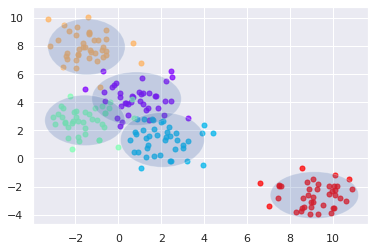

In [ ]:
X,y=genBlobs()
mu,sigma=mlParams(X,y)
plotGaussian(X,y,mu,sigma)

## Assignment 2

In [ ]:
prior=computePrior(y)
preds=classifyBayes(X,prior,mu,sigma)
errors=np.count_nonzero(preds-y)
accuracy=(len(y)-errors) / len(y)
print(accuracy)

0.92


The implemented functions can now be summarized into the `BayesClassifier` class, which we will use later to test the classifier, no need to add anything else here:

In [ ]:
# NOTE: no need to touch this
class BayesClassifier(object):
    def __init__(self):
        self.trained = False

    def trainClassifier(self, X, labels, W=None):
        rtn = BayesClassifier()
        rtn.prior = computePrior(labels, W)
        rtn.mu, rtn.sigma = mlParams(X, labels, W)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBayes(X, self.prior, self.mu, self.sigma)

## Assignment 3

## Test the Maximum Likelihood estimates

Call `genBlobs` and `plotGaussian` to verify your estimates.

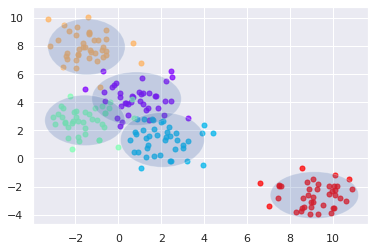

In [ ]:
%matplotlib inline

X, labels = genBlobs(centers=5)
mu, sigma = mlParams(X,labels)
plotGaussian(X,labels,mu,sigma)

Call the `testClassifier` and `plotBoundary` functions for this part.

In [ ]:
testClassifier(BayesClassifier(), dataset='iris', split=0.7)

Trial: 0 Accuracy 84.4
Trial: 10 Accuracy 95.6
Trial: 20 Accuracy 93.3
Trial: 30 Accuracy 86.7
Trial: 40 Accuracy 88.9
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 86.7
Trial: 70 Accuracy 91.1
Trial: 80 Accuracy 86.7
Trial: 90 Accuracy 91.1
Final mean classification accuracy  89 with standard deviation 4.16


In [ ]:
testClassifier(BayesClassifier(), dataset='vowel', split=0.7)

Trial: 0 Accuracy 61
Trial: 10 Accuracy 66.2
Trial: 20 Accuracy 74
Trial: 30 Accuracy 66.9
Trial: 40 Accuracy 59.7
Trial: 50 Accuracy 64.3
Trial: 60 Accuracy 66.9
Trial: 70 Accuracy 63.6
Trial: 80 Accuracy 62.3
Trial: 90 Accuracy 70.8
Final mean classification accuracy  64.7 with standard deviation 4.03


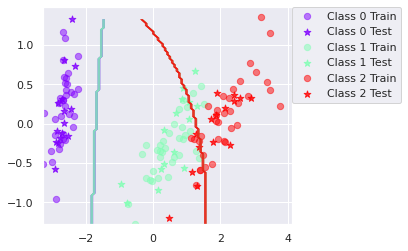

In [ ]:
%matplotlib inline
plotBoundary(BayesClassifier(), dataset='iris',split=0.7)

## When can a feature independence assumption be reasonable and when not?
It is dependent on the data. Apart from applying domain knowledge of the dataset when deciding independence between features, it is possible to use empirical evidence to ascertain independence. For instance, a heatmap / correlation matrix may be used to visualize feature dependence.

** can also use covaaince matrix **

## How does the decision boundary look for the Iris dataset? How could one improve the classification results for this scenario by changing classifier or, alternatively, manipulating the data?
Although the decision boundaries look mostly reasonable, we see some misclassification between classes 1 and 2. We also see some form of correlation between the attributes for those classes, which violates the NB assumption and could have contributed to the errors. We could use a classifier that does not rely on feature independence, such as Decision Trees. Alteratively, we could attempt to reduce feature dependence through feature engineering / transformation.

## Boosting functions to implement

The lab descriptions state what each function should do.

## Assignment 4

In [ ]:
def mlParams(X, labels, W=None):
    assert(X.shape[0]==labels.shape[0])
    Npts,Ndims = np.shape(X)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    if W is None:
        W = np.ones((Npts,1))/float(Npts)

    mu = np.zeros((Nclasses,Ndims))
    sigma = np.zeros((Nclasses,Ndims,Ndims))

    # TODO: fill in the code to compute mu and sigma!
    # ==========================
    for k in classes:
      class_data=X[np.where(labels==k)[0],:]
      weight_data=W[np.where(labels==k)[0],:]
      mu[k,:]=np.sum(class_data*weight_data,axis=0)/np.sum(weight_data,axis=0)
      for feature in range(Ndims):
          feature_data=class_data[:,feature]
          sigma[k,feature,feature]=np.dot(weight_data.T,np.square((feature_data-mu[k,feature])))/np.sum(weight_data,axis=0)
    # ==========================

    return mu, sigma

## Assignment 5

In [ ]:
def computePrior(labels, W=None):
    Npts = labels.shape[0]
    if W is None:
        W = np.ones((Npts,1))/Npts
    else:
        assert(W.shape[0] == Npts)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    prior = np.zeros((Nclasses,1))

    # TODO: compute the values of prior for each class!
    # ==========================
    ## here, we interpret the weight of a data point as it's 'count', thus denominator is sum of all weights
    total_weight=np.sum(W,axis=0)
    for k in classes:
      class_data=labels[np.where(labels==k)[0]]
      weight_data=W[np.where(labels==k)[0]]
      prior[k]=np.sum(weight_data,axis=0)/float(total_weight)
    # ==========================
    return prior

In [ ]:
# in: base_classifier - a classifier of the type that we will boost, e.g. BayesClassifier
#                   X - N x d matrix of N data points
#              labels - N vector of class labels
#                   T - number of boosting iterations
# out:    classifiers - (maximum) length T Python list of trained classifiers
#              alphas - (maximum) length T Python list of vote weights
def trainBoost(base_classifier, X, labels, T=10):
    # these will come in handy later on
    Npts,Ndims = np.shape(X)

    classifiers = [] # append new classifiers to this list
    alphas = [] # append the vote weight of the classifiers to this list

    # The weights for the first iteration
    wCur = np.ones((Npts,1))/float(Npts)

    for i_iter in range(0, T):
        # a new classifier can be trained like this, given the current weights
        classifiers.append(base_classifier.trainClassifier(X, labels, wCur))

        # do classification for each point
        vote = classifiers[-1].classify(X)

        # TODO: Fill in the rest, construct the alphas etc.
        # ==========================
        et=np.float_power(10,-5)
        ## if set to 0 and the classifier is perfect, np.log(0) fails
        ## intuitvely, we want a high alpha for a perfect classifer, so setting an aribtrarily low et should suffice

        for idx,(truth,pred) in enumerate(zip(labels,vote)):
          delta = 1 if truth==pred else 0
          et += wCur[idx]*(1-delta)

        # Compute alpha for iteration t.
        alpha = 0.5*(np.log(1-et)-np.log(et))

        alphas.append(alpha) # you will need to append the new alpha

        # update weights according to equation
        for idx,(truth,pred) in enumerate(zip(labels,vote)):
            coeff = np.exp(-alpha) if truth==pred else np.exp(alpha)
            wCur[idx] *= coeff

        ## divide by total weight to ensure sum of weights == 1
        wCur=wCur/np.sum(wCur,axis=0)
        # ==========================
        
    return classifiers, alphas

# in:       X - N x d matrix of N data points
# classifiers - (maximum) length T Python list of trained classifiers as above
#      alphas - (maximum) length T Python list of vote weights
#    Nclasses - the number of different classes
# out:  yPred - N vector of class predictions for test points
def classifyBoost(X, classifiers, alphas, Nclasses):
    Npts = X.shape[0]
    Ncomps = len(classifiers)

    # if we only have one classifier, we may just classify directly
    if Ncomps == 1:
        return classifiers[0].classify(X)
    else:
        votes = np.zeros((Npts,Nclasses))

        # TODO: implement classificiation when we have trained several classifiers!
        # here we can do it by filling in the votes vector with weighted votes
        # ==========================
        ## we want to weight the vote of each classifier with it's own alpha/reliability/amount of say
        for c in range(Ncomps):
          preds = classifiers[c].classify(X)
          for pt, label in enumerate(preds):
            votes[pt][label] += alphas[c]
        # ==========================

        # one way to compute yPred after accumulating the votes
        return np.argmax(votes,axis=1)

The implemented functions can now be summarized another classifer, the `BoostClassifier` class. This class enables boosting different types of classifiers by initializing it with the `base_classifier` argument. No need to add anything here.

In [ ]:
# NOTE: no need to touch this
class BoostClassifier(object):
    def __init__(self, base_classifier, T=10):
        self.base_classifier = base_classifier
        self.T = T
        self.trained = False

    def trainClassifier(self, X, labels):
        rtn = BoostClassifier(self.base_classifier, self.T)
        rtn.nbr_classes = np.size(np.unique(labels))
        rtn.classifiers, rtn.alphas = trainBoost(self.base_classifier, X, labels, self.T)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBoost(X, self.classifiers, self.alphas, self.nbr_classes)

## Run some experiments

Call the `testClassifier` and `plotBoundary` functions for this part.

In [ ]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='iris',split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 93.3
Trial: 30 Accuracy 91.1
Trial: 40 Accuracy 97.8
Trial: 50 Accuracy 93.3
Trial: 60 Accuracy 93.3
Trial: 70 Accuracy 97.8
Trial: 80 Accuracy 95.6
Trial: 90 Accuracy 93.3
Final mean classification accuracy  94.8 with standard deviation 2.82


In [ ]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='vowel',split=0.7)

Trial: 0 Accuracy 76.6
Trial: 10 Accuracy 86.4
Trial: 20 Accuracy 83.1
Trial: 30 Accuracy 80.5
Trial: 40 Accuracy 69.5
Trial: 50 Accuracy 76
Trial: 60 Accuracy 81.8
Trial: 70 Accuracy 82.5
Trial: 80 Accuracy 79.9
Trial: 90 Accuracy 83.1
Final mean classification accuracy  80.1 with standard deviation 3.6


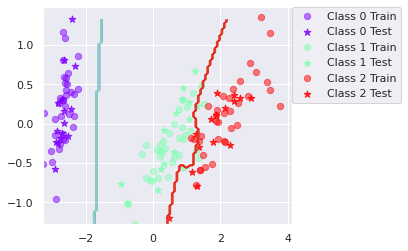

In [ ]:
%matplotlib inline
plotBoundary(BoostClassifier(BayesClassifier()), dataset='iris',split=0.7)

## Is there any improvement in classification accuracy? Why/why not?
We see that accuracy has improved for both Iris (89 to 94.8), and vowel (64.7 to 80.1). The boosting successfully reduced bias by sequentially building weak learners and placing more emphasis on 'difficult' samples, and then taking the weighted average of the individual learners predictions. This allowed the decision boundary to be more flexible in accomodating the vote of each individual learner, thus increasing complexity and reducing bias.

##  Plot the decision boundary of the boosted classifier on iris and compare it with that of the basic. What differences do you notice? Is the boundary of the boosted version more complex?
The decision boundary is indeed more complex and less smooth when ussing a boosted classifier. 

## Can we make up for not using a more advanced model in the basic classifier (e.g. independent features) by using boosting?
Boosting successfully decreased bias (as well as variance as we see above) which implies that it is a viable alternative to using one pure complex model. As we see that the decision boundaries become more complex, it is reasonable to use boosting as a means of increasing complexity of the overall model, while using a simple base model. 

Now repeat the steps with a decision tree classifier.

In [ ]:
testClassifier(DecisionTreeClassifier(), dataset='iris', split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 91.1
Trial: 30 Accuracy 91.1
Trial: 40 Accuracy 93.3
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 88.9
Trial: 70 Accuracy 88.9
Trial: 80 Accuracy 93.3
Trial: 90 Accuracy 88.9
Final mean classification accuracy  92.4 with standard deviation 3.71


In [ ]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='iris',split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 95.6
Trial: 30 Accuracy 93.3
Trial: 40 Accuracy 93.3
Trial: 50 Accuracy 95.6
Trial: 60 Accuracy 88.9
Trial: 70 Accuracy 93.3
Trial: 80 Accuracy 93.3
Trial: 90 Accuracy 93.3
Final mean classification accuracy  94.6 with standard deviation 3.67


In [ ]:
testClassifier(DecisionTreeClassifier(), dataset='vowel',split=0.7)

Trial: 0 Accuracy 63.6
Trial: 10 Accuracy 68.8
Trial: 20 Accuracy 63.6
Trial: 30 Accuracy 66.9
Trial: 40 Accuracy 59.7
Trial: 50 Accuracy 63
Trial: 60 Accuracy 59.7
Trial: 70 Accuracy 68.8
Trial: 80 Accuracy 59.7
Trial: 90 Accuracy 68.2
Final mean classification accuracy  64.1 with standard deviation 4


In [ ]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='vowel',split=0.7)

Trial: 0 Accuracy 86.4
Trial: 10 Accuracy 88.3
Trial: 20 Accuracy 88.3
Trial: 30 Accuracy 90.3
Trial: 40 Accuracy 85.1
Trial: 50 Accuracy 81.8
Trial: 60 Accuracy 89.6
Trial: 70 Accuracy 88.3
Trial: 80 Accuracy 84.4
Trial: 90 Accuracy 83.8
Final mean classification accuracy  86.8 with standard deviation 2.92


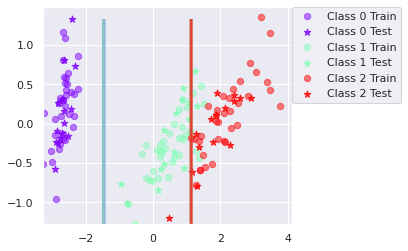

In [ ]:
%matplotlib inline
plotBoundary(DecisionTreeClassifier(), dataset='iris',split=0.7)

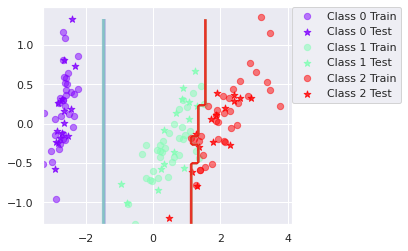

In [ ]:
%matplotlib inline
plotBoundary(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='iris',split=0.7)

## Assignment 6 and 7

### Is there any improvement in classification accuracy? Why/why not?
We see that accuracy has improved for both Iris (92.4 to 94.6), and vowel (64.1 to 86.8). Same reasons as for NB.

###  Plot the decision boundary of the boosted classifier on iris and compare it with that of the basic. What differences do you notice? Is the boundary of the boosted version more complex?
The decision boundary is indeed more complex and less smooth when ussing a boosted classifier. 

### Can we make up for not using a more advanced model in the basic classifier (e.g. independent features) by using boosting?
Same reasoning as for NB.

### If you had to pick a classifier, naive Bayes or a decision tree or the boosted versions of these, which one would you pick? Motivate from the following criteria:
**Outliers:** In terms of dealing with noisy data with many outliers, I would lean towards decision trees / boosted decision trees. Naive Bayes is a statistical method that depends on mean and variance, thus outliers that highly skew these values would have significant effect on the robustness of the model. Decision trees follow a rule-based method based on uncertainty of nodes, which are less affected by outliers assuming the frequency of outliers are quite low. In the case of overlapping data as in the above plots, we see that Boosted DT is able to also draw boundaries to address these points. 

**Irrelevant inputs:** I would also lean towards decision trees / Boosted DT due to the implicit feature selection done when deciding which feature to split by. Boosted DTs reinforce this as each weak learner is built to focus on reducing the errors of the previous learner, thus automatically focusing on the best feature to split to continually reduce error.

**Predictive power:** I would choose Boosted versions of either base learner, as boosting has been shown to reduce bias in this lab.

**Mixed types of data:** For mixed data, I would lean towards decision trees / Boosted DT. Naive Bayes implementation here requires building a matrix of mean and variances of the features. For continuous features, this makes sense. However for categorical features, the mean and variance cannot really be interpreted in the same way. 

**Scalability:** In all cases, I would pick Boosted Decision Trees. The implicit feature selection is useful for large number of features, and the boosting allows complex relationships to be identified that may present itself as the amount of data grows.

** note that with increasing dimensions, there is chance of highly correlated features which may lead to redundant splits and deep trees. **

## Bonus: Visualize faces classified using boosted decision trees

Note that this part of the assignment is completely voluntary! First, let's check how a boosted decision tree classifier performs on the olivetti data. Note that we need to reduce the dimension a bit using PCA, as the original dimension of the image vectors is `64 x 64 = 4096` elements.

In [ ]:
testClassifier(BayesClassifier(), dataset='olivetti',split=0.7, dim=20)

In [ ]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='olivetti',split=0.7, dim=20)

You should get an accuracy around 70%. If you wish, you can compare this with using pure decision trees or a boosted bayes classifier. Not too bad, now let's try and classify a face as belonging to one of 40 persons!

In [ ]:
%matplotlib inline
X,y,pcadim = fetchDataset('olivetti') # fetch the olivetti data
xTr,yTr,xTe,yTe,trIdx,teIdx = trteSplitEven(X,y,0.7) # split into training and testing
pca = decomposition.PCA(n_components=20) # use PCA to reduce the dimension to 20
pca.fit(xTr) # use training data to fit the transform
xTrpca = pca.transform(xTr) # apply on training data
xTepca = pca.transform(xTe) # apply on test data
# use our pre-defined decision tree classifier together with the implemented
# boosting to classify data points in the training data
classifier = BoostClassifier(DecisionTreeClassifier(), T=10).trainClassifier(xTrpca, yTr)
yPr = classifier.classify(xTepca)
# choose a test point to visualize
testind = random.randint(0, xTe.shape[0]-1)
# visualize the test point together with the training points used to train
# the class that the test point was classified to belong to
visualizeOlivettiVectors(xTr[yTr == yPr[testind],:], xTe[testind,:])